# Group locations to create Water Target

Objective: Use Clustering methods to group "like" locations together so that a target daily water usage can be created for each location.

Data: Water Usage.csv

Columns
- Location
- Total_Fresh_Sales
- Total_FoodCourt_Sales
- Total_Sales = Fresh Sales + Food Court Sales + Other Sales
- Total_Other_Sales
- Median_Fresh_Sales
- Median_FoodCourt_Sales
- Median_Sales
- Median_Other_Sales
- State
- Total_Water_Usage = Total Cooling + Total Irrigation + Total Operations
- Total_Cooling
- Total_Irrigation
- Total_Operations
- Median_Total_Water
- Median_Total_Cooling
- Median_Total_Irrigation
- Median_Total_Operations
- Total_Shoppers = Total shoppers during the time period
- Median_Total_Shoppers


# 1) Pre-Processing (Import Libraries and Files)

In [1]:
#Import Libraries

#Overall
import os
import sys
import warnings
import itertools
import numpy as np
from numpy import unique, where
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Graph
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sns.set()

#Clustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

In [2]:
#Set Directory
print('\nRead in data file')
indirname = r'C:\Users\ljens\Desktop\Python'
outdirname = r'C:\Users\ljens\Desktop\Python'


Read in data file


In [3]:
#Read in data
data_file3 = os.path.join(indirname, r'Water Usage.csv')
dataset = pd.read_csv(data_file3)
print(dataset.head())

   Location  Total_Fresh_Sales  Total_FoodCourt_Sales  Total_Sales  \
0         1            4874125                2286979      7270702   
1         2            2569164                 888268      7446159   
2         3            3709224                2145942      6594680   
3         4             733929                2802909      8907771   
4         5            3847313                 873909      8116338   

   Total_Other_Sales  Median_Fresh_Sales  Median_FoodCourt_Sales  \
0             109598              993153                  896289   
1            3988727              914152                  414051   
2             739514              334502                  539797   
3            5370933              268834                  422747   
4            3395116              321519                  652507   

   Median_Sales  Median_Other_Sales State  Total_Water_Usage  Total_Cooling  \
0       1668777             1629772    AL            1269911         598677   
1       1429

# 2) Data Exploration

Let's make some histogram to see how the data is distributed. While you can utilize various data science methods you don't always need to so sometime histograms will give you enough of an answer.

(array([29., 34., 48., 40., 42., 50., 36., 31., 39., 39., 42., 32., 38.]),
 array([  11373.        ,  394301.69230769,  777230.38461538,
        1160159.07692308, 1543087.76923077, 1926016.46153846,
        2308945.15384615, 2691873.84615385, 3074802.53846154,
        3457731.23076923, 3840659.92307692, 4223588.61538462,
        4606517.30769231, 4989446.        ]),
 <BarContainer object of 13 artists>)

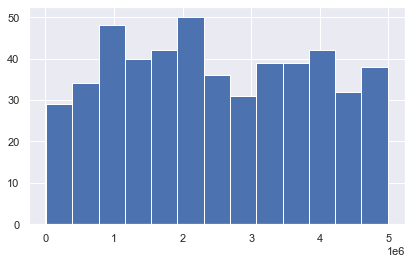

In [4]:
plt.hist(dataset['Total_Fresh_Sales'], bins=13)

In [5]:
a, b = np.histogram(dataset['Total_Fresh_Sales'],bins=13)

sum_fresh_results = np.digitize(dataset['Total_Fresh_Sales'], bins=b)

In [6]:
sum_fresh_result = pd.DataFrame(sum_fresh_results)
print(sum_fresh_results)

[13  7 10  2 11  9  4 12  5  2 11  6  8  5 13 10  7  4  9  1  7  2 11  6
  7 10  2  5  4  8 12 10  5  5  7  2  3 10 10 13 13  2  4 12 11  8 12  1
  4  5  1  5  6  6 13  4  8  4 10  3  8  4  6  7 11  3 12  9  6 11  8  3
  5  5  4 13  9  1 10 13 12  8 10  3  8 10 11  1  4  5  9  5 10  3 11 14
  2  3  4 12 11 10 13  3  4  6  2  9  7 13  2  5  7  2 11  5  7 13 13  9
  7 10  3  9 12 13  6  3 12  5 11  3  6 13 11  1  8  7  3  5  3  2  3  4
  5  9  3 12  6  1  6 11 12 11  7  4  8  8  3  5  6  6  7 12  9  6 12  3
  9 11 11  7 10  8  7  3  2  4 11  5 12  3  2  2  8  6  9  5  4  4 13  4
  6  9  3  4 13 13 12  9 11 10 11  2 10 11 11 10  7  2  1  8  8 13  6  3
 12 10  6  3  6  1  7 11  7  2 11  6 13  5  7  5  6  7 11 12  6  4  5  9
  4  1  6  1  1  1  3  9 13  3  5 11  8 10 11  8  8  2  8  1  5  4  8 11
  6  6  9  7  2  5 11  1  9 13  7  6  1  4 12 12  3  2  3  7  6 10  5  7
 10  2  1  6 12  3  9 13  6 13 11  1  7  6 11 13  8 10  1  5  9 12  5  9
  9  4 11 11  2  9  6  4  8  5  9  3 11 10  3 13 12

(array([41., 31., 47., 37., 33., 34., 40., 38., 46., 43., 37., 41., 32.]),
 array([3.49000000e+02, 7.71416923e+04, 1.53934385e+05, 2.30727077e+05,
        3.07519769e+05, 3.84312462e+05, 4.61105154e+05, 5.37897846e+05,
        6.14690538e+05, 6.91483231e+05, 7.68275923e+05, 8.45068615e+05,
        9.21861308e+05, 9.98654000e+05]),
 <BarContainer object of 13 artists>)

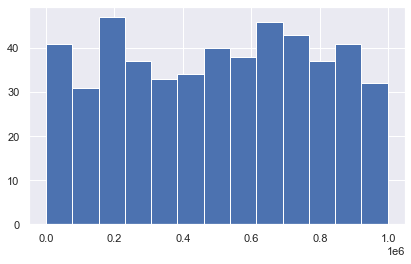

In [7]:
plt.hist(dataset['Median_Fresh_Sales'], bins=13)

In [8]:
a, b = np.histogram(dataset['Median_Fresh_Sales'],bins=13)

median_fresh_results = np.digitize(dataset['Median_Fresh_Sales'], bins=b)
median_fresh_result = pd.DataFrame(median_fresh_results)
print(median_fresh_results)

[13 12  5  4  5  3 12 11  1  4 10  3 10  8  4  8  1  8  4  5  9  3 11  4
  7  1  4  2  3 10  8  4 12 11  5  8 13  5  7  1  7  7  9  4 12 12  3  1
  1  3  4 10  2 11  7 10  9  1  1  6 11  3 13  8 10  1 11  5 10  2  3  9
 10  7  3  5  2  8  5 10  8  2  1 12  1 11  2  5 10  9 13  4  5  1  1 10
  4  2  4  7 10  6  3 12  8  4  2  6 13 11  9 13  7  3  4 12  1  1  9  5
 13 11  8  6  4 12  9 14  7  7 12  2  6  3 12 11  2 12  3  2 12 11  3  3
 10  8  1  2  2 10  9  3 13  9  8  3 12  3  6  1  1 11 12 10  1 12 12  4
  3  3 13  7  2  8  8 10  8  9  1 10  8 12  6 13  8  8  6 10  9 13  2  6
 12  3 11  3  9  5  8  9 11  5 12 13  7  9  4  3  3 13  7  4 13 10 11  4
  7  9  9 10  7  9  1  4 12  7  1 12  1 11 10 10 12  5  1  2  1 10 13  5
  5  6 12  6  4 10  6  3  7  8  6  7  7 10  2 11  5  2  2  6  3 10 10 12
  9  6  3  2  9 12 12  4  1 11 10 13  6  6  6  9 12  4 13  5  7  1 12 10
  1 11  2  5  5  7 11  1  8  3  7  9  9 13  4 13  8  2  7  7  6  9 12  4
  4  2  3  2 13  7  5  1  3 11 13  8  6 13  8 10 10

(array([48., 36., 50., 38., 33., 34., 42., 29., 29., 44., 42., 39., 36.]),
 array([1.70000000e+02, 2.30866692e+05, 4.61563385e+05, 6.92260077e+05,
        9.22956769e+05, 1.15365346e+06, 1.38435015e+06, 1.61504685e+06,
        1.84574354e+06, 2.07644023e+06, 2.30713692e+06, 2.53783362e+06,
        2.76853031e+06, 2.99922700e+06]),
 <BarContainer object of 13 artists>)

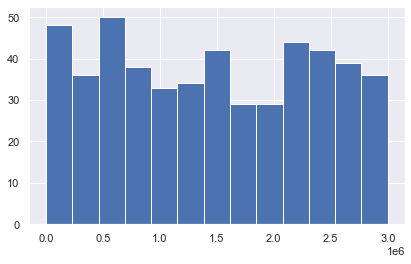

In [9]:
plt.hist(dataset['Total_FoodCourt_Sales'], bins=13)

In [10]:
a, b = np.histogram(dataset['Total_FoodCourt_Sales'],bins=13)

sum_food_court_results = np.digitize(dataset['Total_FoodCourt_Sales'], bins=b)
sum_food_court_result = pd.DataFrame(sum_food_court_results)

print(sum_food_court_result)

      0
0    10
1     4
2    10
3    13
4     4
..   ..
495   9
496   1
497   3
498   9
499   3

[500 rows x 1 columns]


(array([38., 41., 39., 34., 36., 39., 37., 28., 37., 36., 42., 49., 44.]),
 array([5008034.        , 5391093.15384615, 5774152.30769231,
        6157211.46153846, 6540270.61538462, 6923329.76923077,
        7306388.92307692, 7689448.07692308, 8072507.23076923,
        8455566.38461538, 8838625.53846154, 9221684.69230769,
        9604743.84615385, 9987803.        ]),
 <BarContainer object of 13 artists>)

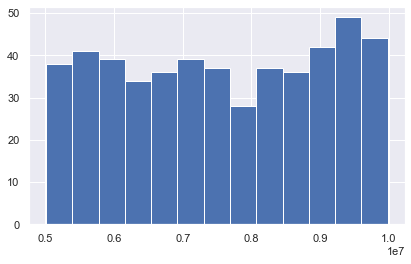

In [11]:
plt.hist(dataset['Total_Sales'], bins=13)

In [12]:
a, b = np.histogram(dataset['Total_Sales'],bins=13)

sum_all_results = np.digitize(dataset['Total_Sales'], bins=b)
sum_all_result = pd.DataFrame(sum_all_results)

print(sum_all_result)

      0
0     6
1     7
2     5
3    11
4     9
..   ..
495   5
496   2
497   1
498   5
499   5

[500 rows x 1 columns]


(array([37., 45., 41., 36., 34., 29., 37., 39., 50., 53., 34., 32., 33.]),
 array([2.03300000e+03, 1.94147923e+05, 3.86262846e+05, 5.78377769e+05,
        7.70492692e+05, 9.62607615e+05, 1.15472254e+06, 1.34683746e+06,
        1.53895238e+06, 1.73106731e+06, 1.92318223e+06, 2.11529715e+06,
        2.30741208e+06, 2.49952700e+06]),
 <BarContainer object of 13 artists>)

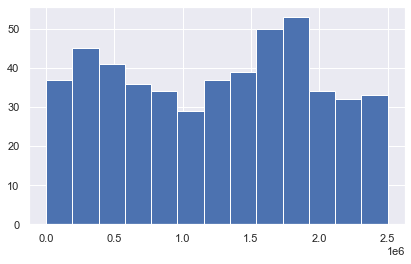

In [13]:
plt.hist(dataset['Median_Sales'], bins=13)

In [14]:
a, b = np.histogram(dataset['Median_Sales'],bins=13)

median_all_results = np.digitize(dataset['Median_Sales'], bins=b)
median_all_result = pd.DataFrame(median_all_results)

print(median_all_result)

      0
0     9
1     8
2    13
3     3
4     9
..   ..
495   5
496   9
497   1
498   7
499   1

[500 rows x 1 columns]


(array([41., 29., 49., 38., 32., 45., 38., 32., 38., 41., 42., 32., 43.]),
 array([   9597.        ,  162652.07692308,  315707.15384615,
         468762.23076923,  621817.30769231,  774872.38461538,
         927927.46153846, 1080982.53846154, 1234037.61538462,
        1387092.69230769, 1540147.76923077, 1693202.84615385,
        1846257.92307692, 1999313.        ]),
 <BarContainer object of 13 artists>)

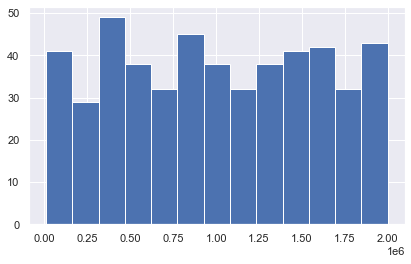

In [15]:
plt.hist(dataset['Total_Shoppers'], bins=13)

In [16]:
a, b = np.histogram(dataset['Total_Shoppers'],bins=13)

sum_door_count_results = np.digitize(dataset['Total_Shoppers'], bins=b)
sum_door_count_result = pd.DataFrame(sum_door_count_results)

print(sum_door_count_result)

      0
0     6
1     6
2     1
3     4
4     6
..   ..
495   1
496  10
497   2
498  13
499  10

[500 rows x 1 columns]


(array([36., 35., 33., 40., 30., 49., 39., 42., 44., 33., 39., 38., 42.]),
 array([  2924.        ,  79510.69230769, 156097.38461538, 232684.07692308,
        309270.76923077, 385857.46153846, 462444.15384615, 539030.84615385,
        615617.53846154, 692204.23076923, 768790.92307692, 845377.61538462,
        921964.30769231, 998551.        ]),
 <BarContainer object of 13 artists>)

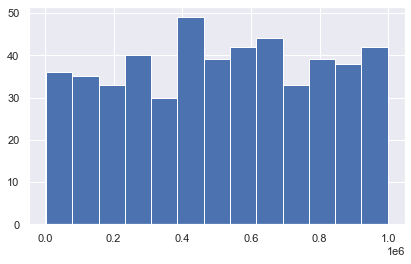

In [17]:
plt.hist(dataset['Median_Total_Shoppers'], bins=13)

In [18]:
a, b = np.histogram(dataset['Median_Total_Shoppers'],bins=13)

median_door_count_results = np.digitize(dataset['Median_Total_Shoppers'], bins=b)
median_door_count_result = pd.DataFrame(median_door_count_results)

print(median_door_count_result)

      0
0     1
1     7
2     5
3     4
4    13
..   ..
495   4
496   1
497  12
498  11
499   2

[500 rows x 1 columns]


In [19]:
output = pd.concat([dataset, sum_fresh_result, median_fresh_result, sum_food_court_result, sum_all_result, median_all_result,
                   sum_door_count_result, median_door_count_result], axis=1)
output.to_csv("SustainabilityClusters.csv")

I have looked at the data, now to scale the data and make sure to deal with any missing values (there aren't any missing values in this case)

In [20]:
#Clean data
df = dataset.drop(['State'], axis=1)
df.fillna(df.median(), inplace=True)
print(f"Total missing values:",df.isna().sum().sum())

Total missing values: 0


In [21]:
Scale the Data
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)

# 3) Identify the optimal number of Clusters

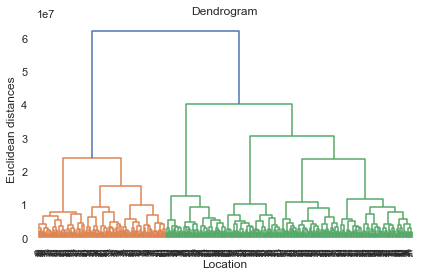

In [22]:
#Using the dendrogram to find the optimal numbers of clusters. 
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Location')
plt.ylabel('Euclidean distances')
plt.show()

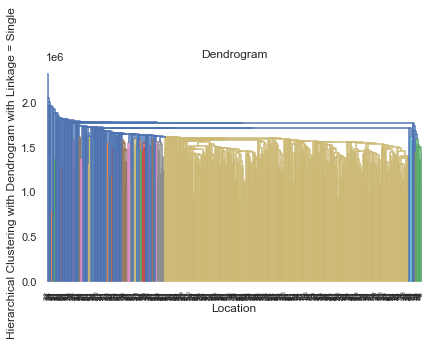

In [23]:
#Using the dendrogram to find the optimal numbers of clusters. 
dendrogram = sch.dendrogram(sch.linkage(df, method  = "single"))
plt.title('Dendrogram')
plt.xlabel('Location')
plt.ylabel('Hierarchical Clustering with Dendrogram with Linkage = Single')
plt.show()

#don't use this

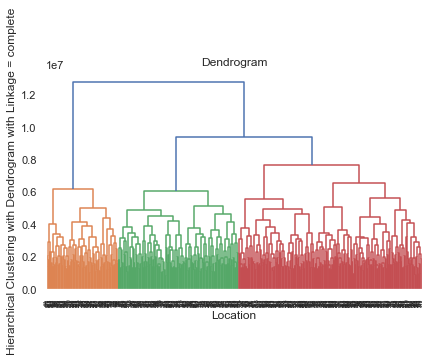

In [24]:
#Using the dendrogram to find the optimal numbers of clusters. 
dendrogram = sch.dendrogram(sch.linkage(df, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Location')
plt.ylabel('Hierarchical Clustering with Dendrogram with Linkage = complete')
plt.show()

#3 clusters

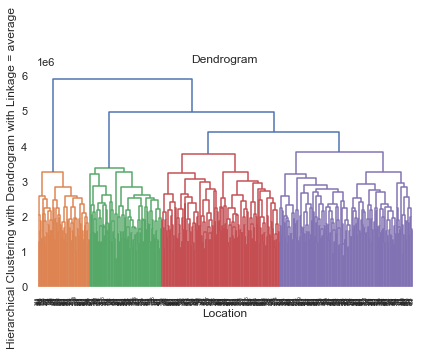

In [25]:
#Using the dendrogram to find the optimal numbers of clusters. 
dendrogram = sch.dendrogram(sch.linkage(df, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Location')
plt.ylabel('Hierarchical Clustering with Dendrogram with Linkage = average')
plt.show()


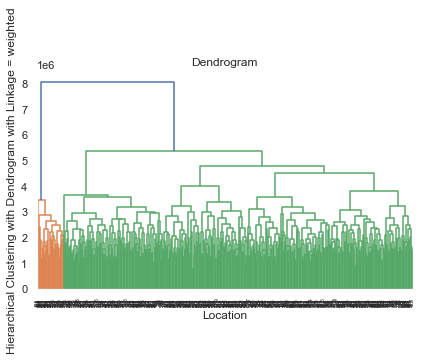

In [26]:
#Using the dendrogram to find the optimal numbers of clusters. 
dendrogram = sch.dendrogram(sch.linkage(df, method  = "weighted"))
plt.title('Dendrogram')
plt.xlabel('Location')
plt.ylabel('Hierarchical Clustering with Dendrogram with Linkage = weighted')
plt.show()

#4 clusters

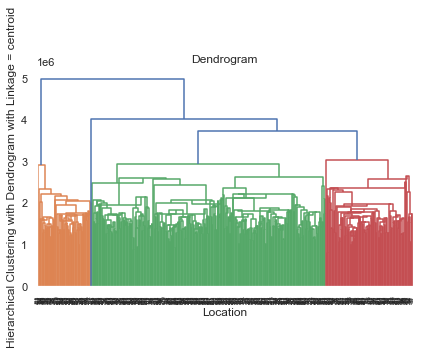

In [27]:
#Using the dendrogram to find the optimal numbers of clusters. 
dendrogram = sch.dendrogram(sch.linkage(df, method  = "centroid"))
plt.title('Dendrogram')
plt.xlabel('Location')
plt.ylabel('Hierarchical Clustering with Dendrogram with Linkage = centroid')
plt.show()

#20 clusters

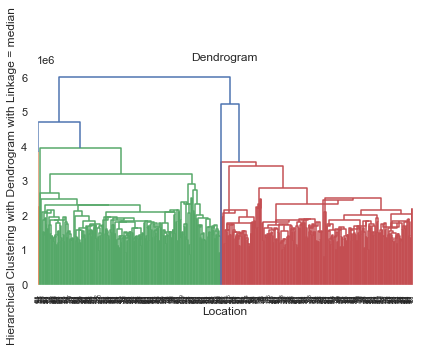

In [28]:
#Using the dendrogram to find the optimal numbers of clusters. 
dendrogram = sch.dendrogram(sch.linkage(df, method  = "median"))
plt.title('Dendrogram')
plt.xlabel('Location')
plt.ylabel('Hierarchical Clustering with Dendrogram with Linkage = median')
plt.show()

#3 clusters

The various dendrograms produced a wide variety of recommended number of clusters. I actually changed the data for this so that's partly why the results are so odd.  The real data actually told me to pick 4 clusters.

# AgglomerativeClustering

In [29]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(df)

In [30]:
print(y_hc)

[2 1 2 0 3 3 0 0 0 1 3 1 0 0 2 3 0 1 0 0 1 0 3 1 1 2 1 1 1 0 3 3 0 0 0 1 0
 0 3 3 2 1 1 2 0 0 2 0 0 0 1 1 0 1 2 1 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 1
 1 0 0 0 2 2 2 1 2 0 1 2 2 0 1 1 1 1 3 0 2 3 0 1 1 2 2 3 2 0 0 1 0 0 0 2 1
 0 1 0 3 0 0 3 3 0 0 0 1 0 3 2 1 1 2 0 2 0 1 0 3 0 2 1 1 1 1 0 1 1 0 0 0 2
 0 1 0 3 3 2 1 1 2 3 1 1 0 0 1 2 2 1 2 0 0 3 3 1 3 3 1 1 0 0 2 0 3 0 0 0 0
 1 0 1 1 1 3 0 1 3 0 1 3 0 2 1 3 2 2 1 0 2 0 3 1 0 1 1 3 3 0 1 2 2 1 1 1 1
 1 3 0 1 2 0 2 1 1 1 1 1 2 2 1 1 1 3 1 1 1 1 1 1 0 3 2 0 1 3 1 1 3 1 0 0 1
 0 0 0 3 3 1 1 2 1 1 0 3 0 1 3 1 0 1 0 2 0 1 1 0 0 1 3 0 3 2 0 0 0 2 1 1 3
 1 3 2 1 2 1 2 0 1 2 0 1 0 3 1 0 3 1 3 2 0 3 0 0 1 1 3 0 2 0 1 0 2 0 1 0 2
 1 0 1 1 0 2 0 1 0 0 3 0 1 0 0 0 1 0 1 1 1 0 1 3 3 3 1 3 1 3 2 1 1 1 1 1 1
 0 2 1 0 0 1 1 0 1 0 1 2 2 1 3 0 1 0 1 2 1 0 0 0 1 2 1 0 0 2 3 3 1 2 1 1 1
 3 2 0 0 1 0 2 1 0 1 2 0 3 0 1 1 0 0 3 3 0 2 0 0 0 0 1 1 0 2 1 1 0 1 0 1 0
 0 2 2 1 2 1 3 0 3 1 0 2 3 0 0 0 2 0 1 0 1 1 0 0 1 3 3 2 1 3 0 1 2 3 1 3 0
 1 3 2 1 1 3 0 2 1 0 1 1 

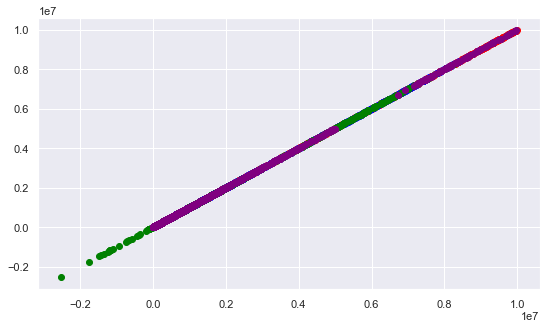

In [31]:
plt.figure(figsize = (8,5))
plt.scatter(df[y_hc == 0] , df[y_hc == 0] , c = 'red')
plt.scatter(df[y_hc == 1] , df[y_hc == 1] , c = 'blue')
plt.scatter(df[y_hc == 2] , df[y_hc == 2] , c = 'green')
plt.scatter(df[y_hc == 3] , df[y_hc == 3] , c = 'purple')
plt.show()

In [32]:
result = pd.DataFrame(y_hc)
print(result)
agglomerative2 = pd.concat([output, result], axis=1)
agglomerative2.to_csv("SustainabilityClusters.csv")

     0
0    2
1    1
2    2
3    0
4    3
..  ..
495  2
496  2
497  1
498  1
499  1

[500 rows x 1 columns]


# BIRCH

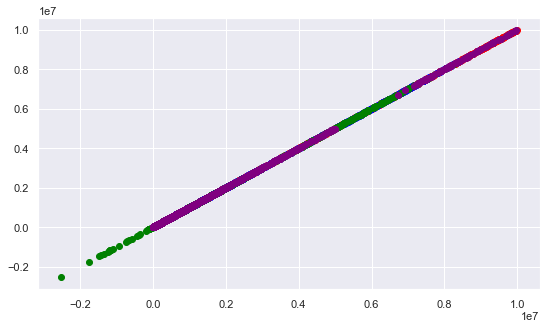

In [41]:
model = Birch(threshold=0.01, n_clusters=4)
model.fit(df)
# assign a cluster to each example
yhat = model.predict(df)

plt.figure(figsize = (8,5))
plt.scatter(df[yhat == 0] , df[yhat == 0] , c = 'red')
plt.scatter(df[yhat == 1] , df[yhat == 1] , c = 'blue')
plt.scatter(df[yhat == 2] , df[yhat == 2] , c = 'green')
plt.scatter(df[yhat == 3] , df[yhat == 3] , c = 'purple')
plt.show()


In [34]:
result = pd.DataFrame(yhat)
print(result)
agglomerative3 = pd.concat([agglomerative2, result], axis=1)
agglomerative3.to_csv("SustainabilityClusters.csv")

      0
0     0
1     1
2     0
3     2
4    10
..   ..
495   0
496   7
497   8
498   9
499   1

[500 rows x 1 columns]


# DBSCAN

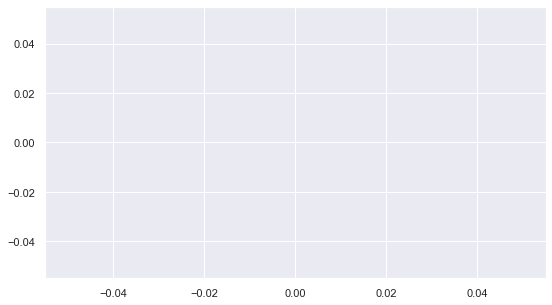

In [42]:
model = DBSCAN(eps=0.30, min_samples=4)
model.fit(df)
# assign a cluster to each example
yhat = model.fit_predict(df)

plt.figure(figsize = (8,5))
plt.scatter(df[yhat == 0] , df[yhat == 0] , c = 'red')
plt.scatter(df[yhat == 1] , df[yhat == 1] , c = 'blue')
plt.scatter(df[yhat == 2] , df[yhat == 2] , c = 'green')
plt.scatter(df[yhat == 3] , df[yhat == 3] , c = 'purple')
plt.show()

In [36]:
#That one wasn't helpful so not going to use it

# KMeans

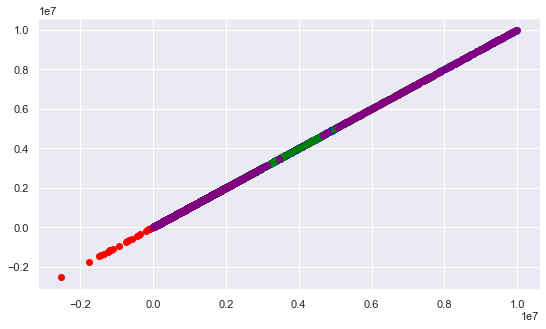

In [43]:
model = KMeans(n_clusters=4)
model.fit(df)
# assign a cluster to each example
yhat = model.predict(df)

plt.figure(figsize = (8,5))
plt.scatter(df[yhat == 0] , df[yhat == 0] , c = 'red')
plt.scatter(df[yhat == 1] , df[yhat == 1] , c = 'blue')
plt.scatter(df[yhat == 2] , df[yhat == 2] , c = 'green')
plt.scatter(df[yhat == 3] , df[yhat == 3] , c = 'purple')
plt.show()

In [38]:
result = pd.DataFrame(yhat)
print(result)
agglomerative4 = pd.concat([agglomerative3, result], axis=1)
agglomerative4.to_csv("SustainabilityClusters.csv")

      0
0     2
1    11
2     2
3     6
4    11
..   ..
495   8
496   4
497   0
498   5
499   5

[500 rows x 1 columns]


C:\Users\ljens\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\ljens\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


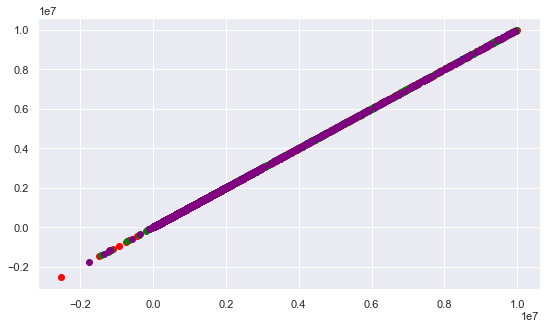

In [44]:
model = SpectralClustering(n_clusters=4)
model.fit(df)
# assign a cluster to each example
yhat = model.fit_predict(df)

plt.figure(figsize = (8,5))
plt.scatter(df[yhat == 0] , df[yhat == 0] , c = 'red')
plt.scatter(df[yhat == 1] , df[yhat == 1] , c = 'blue')
plt.scatter(df[yhat == 2] , df[yhat == 2] , c = 'green')
plt.scatter(df[yhat == 3] , df[yhat == 3] , c = 'purple')
plt.show()

In [40]:
result = pd.DataFrame(yhat)
print(result)
agglomerative5 = pd.concat([agglomerative4, result], axis=1)
agglomerative5.to_csv("SustainabilityClusters.csv")

     0
0    2
1    1
2    2
3    1
4    7
..  ..
495  7
496  2
497  1
498  4
499  1

[500 rows x 1 columns]
